In [77]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from math import e
from sklearn.metrics import log_loss

# 1

In [2]:
data=pd.read_csv("gbm-data.csv")

In [3]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [14]:
x=data.iloc[:,1:].as_matrix()
y=data.iloc[:,0].as_matrix()

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.8,random_state = 241)

# 2-4

In [106]:
gb=GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,learning_rate=0.2)

In [107]:
gb.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2613           15.58s
         2           1.1715           15.84s
         3           1.1009           15.75s
         4           1.0529           15.96s
         5           1.0130           16.05s
         6           0.9740           15.79s
         7           0.9475           15.48s
         8           0.9197           15.62s
         9           0.8979           15.25s
        10           0.8730           15.21s
        20           0.7207           14.69s
        30           0.6055           13.66s
        40           0.5244           12.75s
        50           0.4501           12.02s
        60           0.3908           11.29s
        70           0.3372           10.65s
        80           0.3009           10.01s
        90           0.2603            9.40s
       100           0.2327            8.76s
       200           0.0835            2.84s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=250, presort='auto', random_state=241,
              subsample=1.0, verbose=True, warm_start=False)

In [116]:
#Test
test_pred=[]
tmp=[]
for i, y_pred in enumerate(gb.staged_decision_function(x_test)):
        for j in y_pred:
            tmp.append(1/(1 + e**(-j[0])))
        test_pred.append(log_loss(y_test,tmp))
        tmp=[]

In [117]:
#train
train_pred=[]
tmp=[]
for i, y_pred in enumerate(gb.staged_decision_function(x_train)):#ПОЛЕЗНО
        for j in y_pred:
            tmp.append(1/(1 + e**(-j[0])))
        train_pred.append(log_loss(y_train,tmp))
        tmp=[]

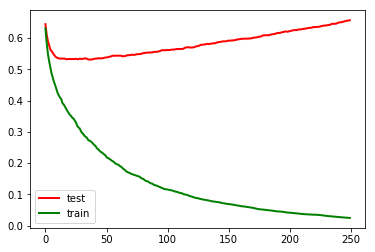

In [118]:
#ПОЛЕЗНО
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(test_pred, 'r', linewidth=2)
plt.plot(train_pred, 'g', linewidth=2)
plt.legend(['test', 'train'])

In [ ]:
with open("a1.txt","w") as f:
    f.write("overfitting")

In [120]:
min(test_pred)

0.53109463759688502

In [122]:
test_pred.index(0.53109463759688502)

36

In [123]:
with open("a2.txt","w") as f:
    f.write("0.53 36")

In [148]:
# Кол-во итераций с наилучшим качестввом
test_pred.index(min(test_pred))

36

# 5

In [149]:
rf=RandomForestClassifier(n_estimators=36,random_state=241)

In [150]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=36, n_jobs=1, oob_score=False, random_state=241,
            verbose=0, warm_start=False)

In [151]:
pred=rf.predict_proba(x_test)
log_loss(y_test,pred)

0.54138128618040693

In [153]:
with open("a3.txt","w") as f:
    f.write("0.54")